In [9]:
from tasks.preprocessing import TaskTrainTestSplit, TaskPrepareXY
from tasks.preprocessing import ProblemType
import d6tflow

In [10]:
dataTask = TaskTrainTestSplit(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, encode_type=False)
#d6tflow.run(dataTask)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.metrics import Recall

import numpy as np

In [11]:
X_train, y_train, X_test, y_test = dataTask.outputLoad()

In [11]:
max_length = 20
top_words = 1000 + 2 #since we normaly use 0..1000 for normal tokens and 1001 for unknown token, it needs +2?
embedding_vecor_length = 32

recall_metric = Recall()
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall_metric])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            32064     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 85,365
Trainable params: 85,365
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
5864/5864 [==============================] - 62s 11ms/step - loss: 0.0323 - accuracy: 0.9889 - recall: 0.9861
Epoch 2/3
5864/5864 [==============================] - 62s 11ms/step - loss: 0.0112 - accuracy: 0.9966 - recall: 0.9969
Epoch 3/3
5864/5864 [==============================] - 62s 11ms/step - loss: 0.0093 - accuracy: 0.9972 - recall: 0.9979


In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.996579
Precision: 0.945712
Recall: 0.998597
F1 score: 0.971435
[[666022   2370]
 [    58  41286]]


In [3]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
matrix = confusion_matrix(y_test, yhat_classes, normalize='true')
print(matrix)

NameError: name 'y_test' is not defined

In [4]:
model = TaskTrainLstm(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, encode_type=False).outputLoad()

In [15]:
train_rf_probs = model.predict(X_test)
train_rf_predictions = model.predict_classes(X_test)


In [16]:
train_rf_probs[0]
train_rf_predictions[0]

array([0], dtype=int32)

In [1]:
from tasks.lstm import TaskEvaluateLstm, TaskTrainLstm
from tasks.preprocessing import ProblemType
import d6tflow

Loading postgres module without psycopg2 installed. Will crash at runtime if postgres functionality is used.
Loading S3 module without the python package boto3. Will crash at runtime if S3 functionality is used.
Welcome to d6tflow!


INFO: Informed scheduler that task   TaskEvaluateLstm_64_32_False_a9b02ed3c8   has status   PENDING
INFO: Informed scheduler that task   TaskTrainTestSplit_False_raw_data_1000_6745813599   has status   DONE
INFO: Informed scheduler that task   TaskTrainLstm_64_32_False_a9b02ed3c8   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
INFO: [pid 2359] Worker Worker(salt=144131565, workers=1, host=C02YV751LVDQ, username=d064518, pid=2359) running   TaskEvaluateLstm(input_src_path=raw_data, max_vocab_size=1000, problem_type=CONDITION_COMPARISON, window_size=20, step_size=3, encode_type=False, test_split_percentage=0.25, oversampling_enabled=False, ratio_after_oversampling=0.5, undersampling_enabled=True, ratio_after_undersampling=0.5, embedding_vecor_length=32, epochs=3, batch_size=64)
###Running TaskEvaluateLstm
Length Train: 375282, length Test 709736
Test Accuracy 0.9971580982224376
Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.06 Test: 

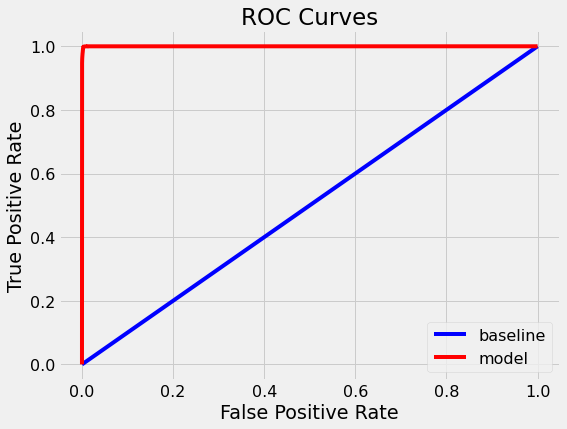

Normalized confusion matrix
[[0.99711098 0.00288902]
 [0.00208011 0.99791989]]
INFO: [pid 2359] Worker Worker(salt=144131565, workers=1, host=C02YV751LVDQ, username=d064518, pid=2359) done      TaskEvaluateLstm(input_src_path=raw_data, max_vocab_size=1000, problem_type=CONDITION_COMPARISON, window_size=20, step_size=3, encode_type=False, test_split_percentage=0.25, oversampling_enabled=False, ratio_after_oversampling=0.5, undersampling_enabled=True, ratio_after_undersampling=0.5, embedding_vecor_length=32, epochs=3, batch_size=64)
INFO: Informed scheduler that task   TaskEvaluateLstm_64_32_False_a9b02ed3c8   has status   DONE
INFO: Worker Worker(salt=144131565, workers=1, host=C02YV751LVDQ, username=d064518, pid=2359) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 3 tasks of which:
* 2 complete ones were encountered:
    - 1 TaskTrainLstm(...)
    - 1 TaskTrainTestSplit(...)
* 1 ran successfully:
    - 1 TaskEvaluateLstm(...)

This pr

True

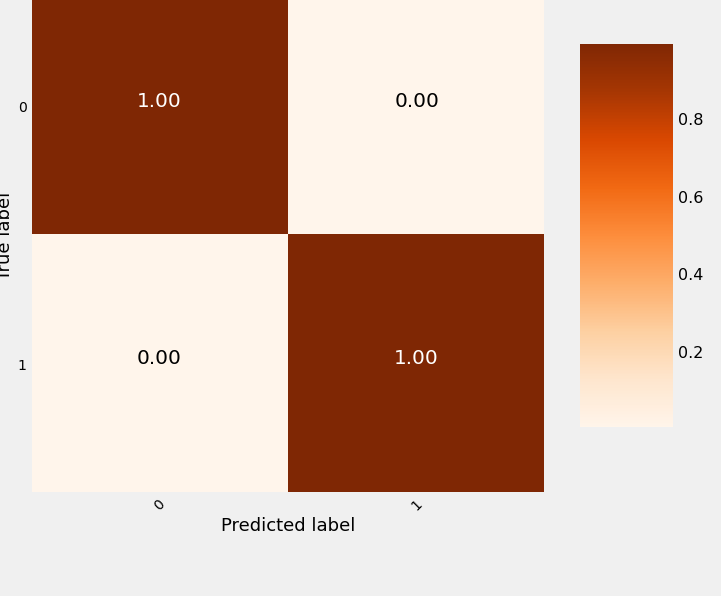

In [2]:
d6tflow.run(TaskEvaluateLstm(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, encode_type=False))